<a href="https://colab.research.google.com/github/charlie-aashutosh/Machine-Learning/blob/master/KNN_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Application Flow 
k-NN is one of the most fundamental algorithms for classification and regression in the Machine Learning world.

But before proceeding with the algorithm, let’s first discuss the lifecycle of any machine learning model. This diagram explains the creation of a Machine Learning model from scratch and then taking the same model further with hyperparameter tuning to increase its accuracy, deciding the deployment strategies for that model and once deployed setting up the logging and monitoring frameworks to generate reports and dashboards based on the client requirements. 
A typical lifecycle diagram for a machine learning model looks like:

<img src="MLApplicationFlow.PNG" width= "300">

# k-Nearest Neighbors

K-nearest neighbors (KNN) is a type of supervised learning algorithm which is used for both regression and classification purposes, but mostly it is used for the later. Given a dataset with different classes, KNN tries to predict the correct class of test data by calculating the distance between the test data and all the training points. It then selects the k points which are closest to the test data.  Once the points are selected, the algorithm calculates the probability (in case of classification) of the test point belonging to the classes of the k training points and the class with the highest probability is selected. In the case of a regression problem, the predicted value is the mean of the k selected training points.


Let’s understand this with an illustration:


1)	Given a training dataset as given below. We have a new test data that we need to assign to one of the two classes.

<img src="1.png" width="">
                                      

2)	Now, the k-NN algorithm calculates the distance between the test data and the given training data.

<img src="2.png" width="">

                                                        
3)	After calculating the distance, it will select the k training points which are nearest to the test data. Let’s assume the value of k is 3 for our example.

<img src="3.png" width="">                                            


4)	Now, 3 nearest neighbors are selected, as shown in the figure above. Let’s see in which class our test data will be assigned :

Number of Green class values = 2
Number of Red class values = 1
Probability(Green) = 2/3
Probability(Red) = 1/3

Since the probability for Green class is higher than Red, the k-NN algorithm will assign the test data to the Green class.

Similarly, if this were the case of a regression problem, the predicted value for the test data will simply be the mean of all the 3 nearest values.

This is the basic working algorithm for k-NN. Let’s understand how the distance is calculated :

### Euclidean Distance: 

It is the most commonly used method to calculate the distance between two points.
The Euclidean distance between two points ‘p(p1,p2)’ and ‘q(q1,q2)’ is calculated  as :

<img src="4.png" width="">       image source : Wikipedia

<img src="5.png" width="">

                                          
Similarly,for n-dimensional space, the Euclidean distance is given as :

<img src="6.png" width="">
 
### Hamming distance
A/c to Wikipedia, hamming distance is a distance metric that measures the number of mismatches between two vectors. It is mostly used in the case of categorical data.

<img src="7.png" width="">
                                                               
Generally, if we have features as categorical data then we consider the difference to be 0 if both the values are the same and the difference is 1 if both the values are different.

### Manhattan Distance
A/c to Wikipedia, The Manhattan distance, also known as L1 norm, Taxicab norm, Rectilinear distance or City block distance. This distance represents the sum of the absolute differences between the opposite values in vectors.

<img src="8.png" width="">
                                                           
Manhattan Distance is less influenced by outliers than the Euclidean distance. With very high dimensional data it is more preferred. 

### Lazy Learners

k-NN algorithms are often termed as Lazy learners. Let’s understand why is that. Most of the algorithms like Bayesian classification, logistic regression, SVM etc., are called Eager learners. These algorithms generalize over the training set before receiving the test data i.e. they create a model based on the training data before receiving the test data and then do the prediction/classification on the test data.
But this is not the case with the k-NN algorithm. It doesn’t create a generalized model for the training set but waits for the test data. Once test data is provided then only it starts generalizing the training data to classify the test data.  So, a lazy learner just stores the training data and waits for the test set. Such algorithms work less while training and more while classifying a given test dataset.

### Weighted Nearest Neighbor
In weighted k-NN, we assign weights to the k nearest neighbors.The weights are typically assigned on the basis of distance.
Sometimes rest of data points are assigned a weight of 0 also. The main intuition is that the points in neighbor should have more weights than father points.



### Choosing the value of k
The value of k affects the k-NN classifier drastically. The flexibility of the model decreases with the increase of ‘k’.  With lower value of ‘k’ variance is high and bias is low but as we increase the value of ‘k’ variance starts decreasing and bias starts increasing. With very low values of ‘k’ there is a chance of algorithm overfitting the data whereas with very high value of ‘k’ there is a chance of underfitting. 
Let’s visualize the trade-off between ‘1/k’, train error rate and test error rate:

<img src="9.png" width="">  image source: “ISLR”

We can clearly see that the train error rate increases with the increase in the value of ‘k’ whereas test error rate decreases initially and then increases again.  So, our goal should be to choose such value of ‘k’ for which we get a minimum of both the errors and avoid overfitting as well as underfitting.
We use different ways to calculate the optimum value of ‘k’ such as cross validation, error versus k curve, checking accuracy for each value of ‘k’ etc. 

### Pros and Cons of k-NN Algorithm

Pros:
*	It can be used for both regression and classification problems.
*	It is very simple and easy to implement.
*	Mathematics behind the algorithm is easy to understand.
*	There is no need to create model or do hyperparameter tuning.
*   KNN doesn't make any assumption for the distribution of the given data.
*   There is not much time cost in training phase.

Cons:
*	Finding the optimum value of ‘k’
*	It takes a lot of time to compute the distance between each test sample and all training samples.
*	Since the model is not saved beforehand in this algorithm (lazy learner), so every time one predicts a test value, it follows the same steps again and again. 
*	Since, we need to store the whole training set for every test set, it requires a lot of space.
*	It is not suitable for high dimensional data.
*   Expensive in testing phase




### Different ways to perform k-NN

Above we studied the way k-NN classifies the data by calculating the distance of test data from each of the observations and selecting ‘k’ values. This approach is also known as “Brute Force k-NN”.  This is computionally very expensive. So, there are other ways as well to perfrom k-NN which are comparatively less expensive than Brute force approach. The idea behind using other algorithms for k-NN classifier is to reduce the time during test period by preprocessing the training data in such a way that the test data can be easily classified in the appropriate clusters.


Let’s discuss and understand the two most famous algorithms:

#### k-Dimensional Tree (kd tree)

k-d tree is a hierarchical binary tree. When this algorithm is used for k-NN classficaition, it rearranges the whole dataset in a binary tree structure, so that when test data is provided, it would give out the result by traversing through the tree, which takes less time than brute search.

<img src="10.png" width=""> 
 
The dataset is divided like a tree as shown in the above figure. Say we have 3 dimensional data i.e. (x,y,z) then the tree is formed with root node being one of the dimensions, here we start with ‘x’. Then on the next level the split is done on basis of the second dimension, ‘y’ in our case. Similarly, third level with 3rd dimension and so on.  And in case of ‘k’ dimensions, each split is made on basis of ‘k’ dimensions. 
Let’s understand how k-d trees are formed with an example:

<img src="11.png" width=""> 

<img src="12.png" width=""> 

<img src="13.png" width=""> 

<img src="14.png" width=""> 
 
 

Once the tree is formed , it is easy for algorithm to search for the probable nearest neighbor just by traversing the tree.  The main problem k-d trees is that it gives probable nearest neighbors but can miss out actual nearest neighbors.

#### Ball Tree

Similar to k-d trees, Ball trees are also hierarchical data structure. These are very efficient specially in case of higher dimensions.

These are formed by following steps:
*	Two clusters are created initially
*	All the data points must belong to atleast one of the clusters.
* 3)	One point cannot be in both clusters.
*	Distance of the point is calculated from the centroid of the each cluster. The point closer to the centroid goes into that particular cluster.
*	Each cluster is then divided into sub clusters again, and then the points are classified into each cluster on the basis of distance from centroid.
*	This is how the clusters are kept to be divided till a certain depth.


<img src="15.png" width=""> 
                                                           

Ball tree formation initially takes a lot of time but once the nested clusters are created, finding nearest neighbors is easier.


We will see the implementation of all the above concepts in python.

# Cross-Validation

Suppose you train a model on a given dataset using any specific algorithm. You tried to find the accuracy of the trained model using the same training data and found the accuracy to be 95% or maybe even 100%. What does this mean? Is your model ready for prediction? The answer is no.
Why? Because your model has trained itself on the given data, i.e. it knows the data and it has generalized over it very well. But when you try and predict over a new set of data, it’s most likely to give you very bad accuracy, because it has never seen the data before and thus it fails to generalizes well over it. This is the problem of overfitting. 
To tackle such problem, Cross-validation comes into the picture. Cross-validation is a resampling technique with a basic idea of dividing the training dataset into two parts i.e. train and test. On one part(train) you try to train the model and on the second part(test) i.e. the data which is unseen for the model, you make the prediction and check how well your model works on it. If the model works with good accuracy on your test data, it means that the model has not overfitted the training data and can be trusted with the prediction, whereas if it performs with bad accuracy then our model is not to be trusted and we need to tweak our algorithm.


Let’s see the different approaches of Cross-Validation:

*	Hold Out Method: 

It is the most basic of the CV techniques. It simply divides the dataset into two sets of training and test. The training dataset is used to train the model and then test data is fitted in the trained model to make predictions. We check the accuracy and assess our model on that basis. This method is used as it is computationally less costly. But the evaluation based on the Hold-out set can have a high variance because it depends heavily on which data points end up in the training set and which in test data. The evaluation will be different every time this division changes.

*	k-fold Cross-Validation

<img src="cv1.png" width=""> 

 img_src:Wikipedia

To tackle the high variance of Hold-out method, the k-fold method is used. The idea is simple, divide the whole dataset into ‘k’ sets preferably of equal sizes. Then the first set is selected as the test set and the rest ‘k-1’ sets are used to train the data. Error is calculated for this particular dataset.
Then the steps are repeated, i.e. the second set is selected as the test data, and the remaining ‘k-1’ sets are used as the training data. Again, the error is calculated. Similarly, the process continues for ‘k’ times. In the end, the CV error is given as the mean of the total errors calculated individually, mathematically given as:

<img src="cv2.png" width=""> 
                                               
The variance in error decreases with the increase in ‘k’. The disadvantage of k-fold cv is that it is computationally expensive as the algorithm runs from scratch for ‘k’ times.

*  Leave One Out Cross Validation (LOOCV)

<img src="cv3.png" width=""> 
 
LOOCV is a special case of k-fold CV, where k becomes equal to n (number of observations). So instead of creating two subsets, it selects a single observation as a test data and rest of data as the training data. The error is calculated for this test observations. Now, the second observation is selected as test data, and the rest of the data is used as the training set. Again, the error is calculated for this particular test observation. This process continues ‘n’ times and in the end, CV error is calculated as:

<img src="cv4.png" width=""> 
                                             

### Bias Variance tradeoff for k-fold CV, LOOCV and Holdout Set CV

There is a very good explanation given in the ISLR Book as given below:


A k-fold CV with k < n has a computational advantage to LOOCV. But putting computational issues aside,
a less obvious but potentially more important advantage of k-fold CV is that it often gives more accurate estimates of the test error rate than does LOOCV.
The validation set approach can lead to overestimates of the test error rate since in this approach the
the training set used to fit the statistical learning method contains only half the observations of the entire data set. Using this logic, it is not hard to see that LOOCV will give approximately unbiased estimates of the test error since each training set contains n − 1 observations, which is almost as many as the number of observations in the full data set. And performing k-fold CV for, say, k = 5 or k = 10 will lead to an intermediate level of bias since each training set contains (k − 1)n/k observations—fewer than
in the LOOCV approach, but substantially more than in the validation set approach. Therefore, from the perspective of bias reduction, it is clear that LOOCV is to be preferred to k-fold CV. However, we know that bias is not the only source for concern in an estimating procedure; we must also consider the procedure’s variance. It turns out that LOOCV has higher variance than does k-fold CV with k < n. Why
is this the case? When we perform LOOCV, we are in effect averaging the outputs of n fitted models, each of which is trained on an almost identical set of observations; therefore, these outputs are highly (positively) correlated with each other. In contrast, when we perform k-fold CV with k < n, we are averaging the outputs of k fitted models that are somewhat less correlated with each other since the overlap between the training sets in each model is smaller. Since the mean of many highly correlated quantities has higher variance than does the mean of many quantities that are not as highly correlated, the test error estimate resulting from LOOCV tends to have higher variance than does the test error estimate resulting from k-fold CV.
















### Python implementation

In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#Let's start with importing necessary libraries
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
knn = KNeighborsClassifier()

In [5]:
data = pd.read_csv("/content/diabetes.csv") # Reading the Data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


It seems that there are no missing values in our data. Great, let's see the distribution of data:

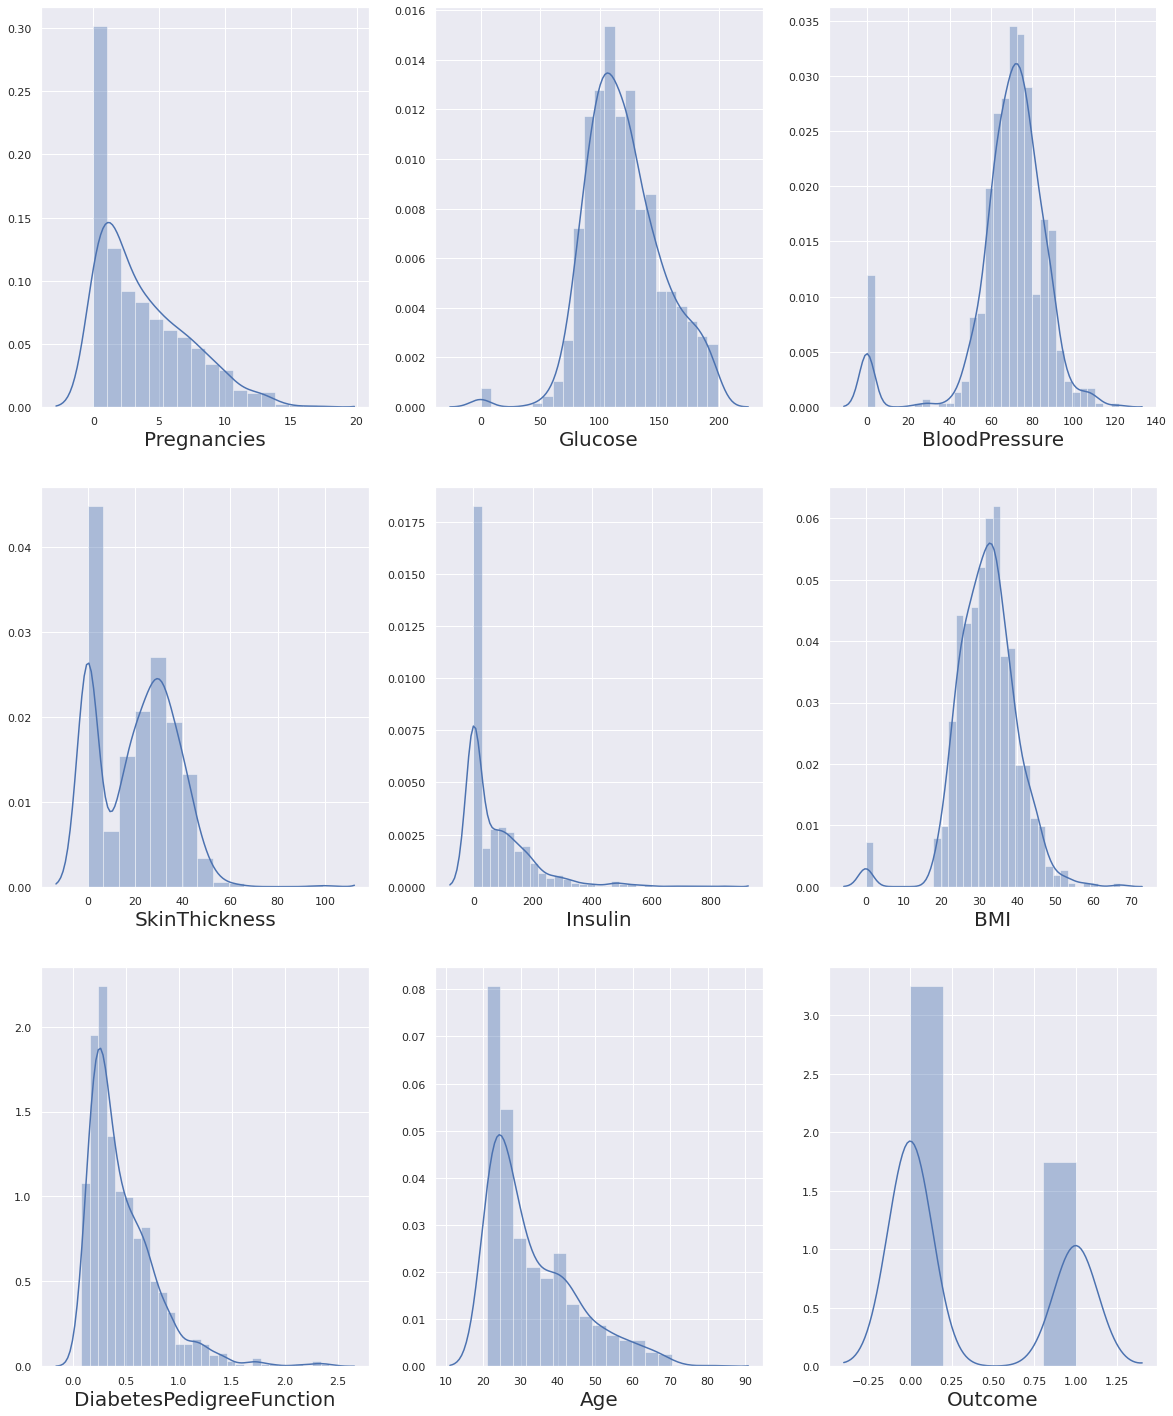

In [7]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
Let's do the latter.


In [8]:
# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

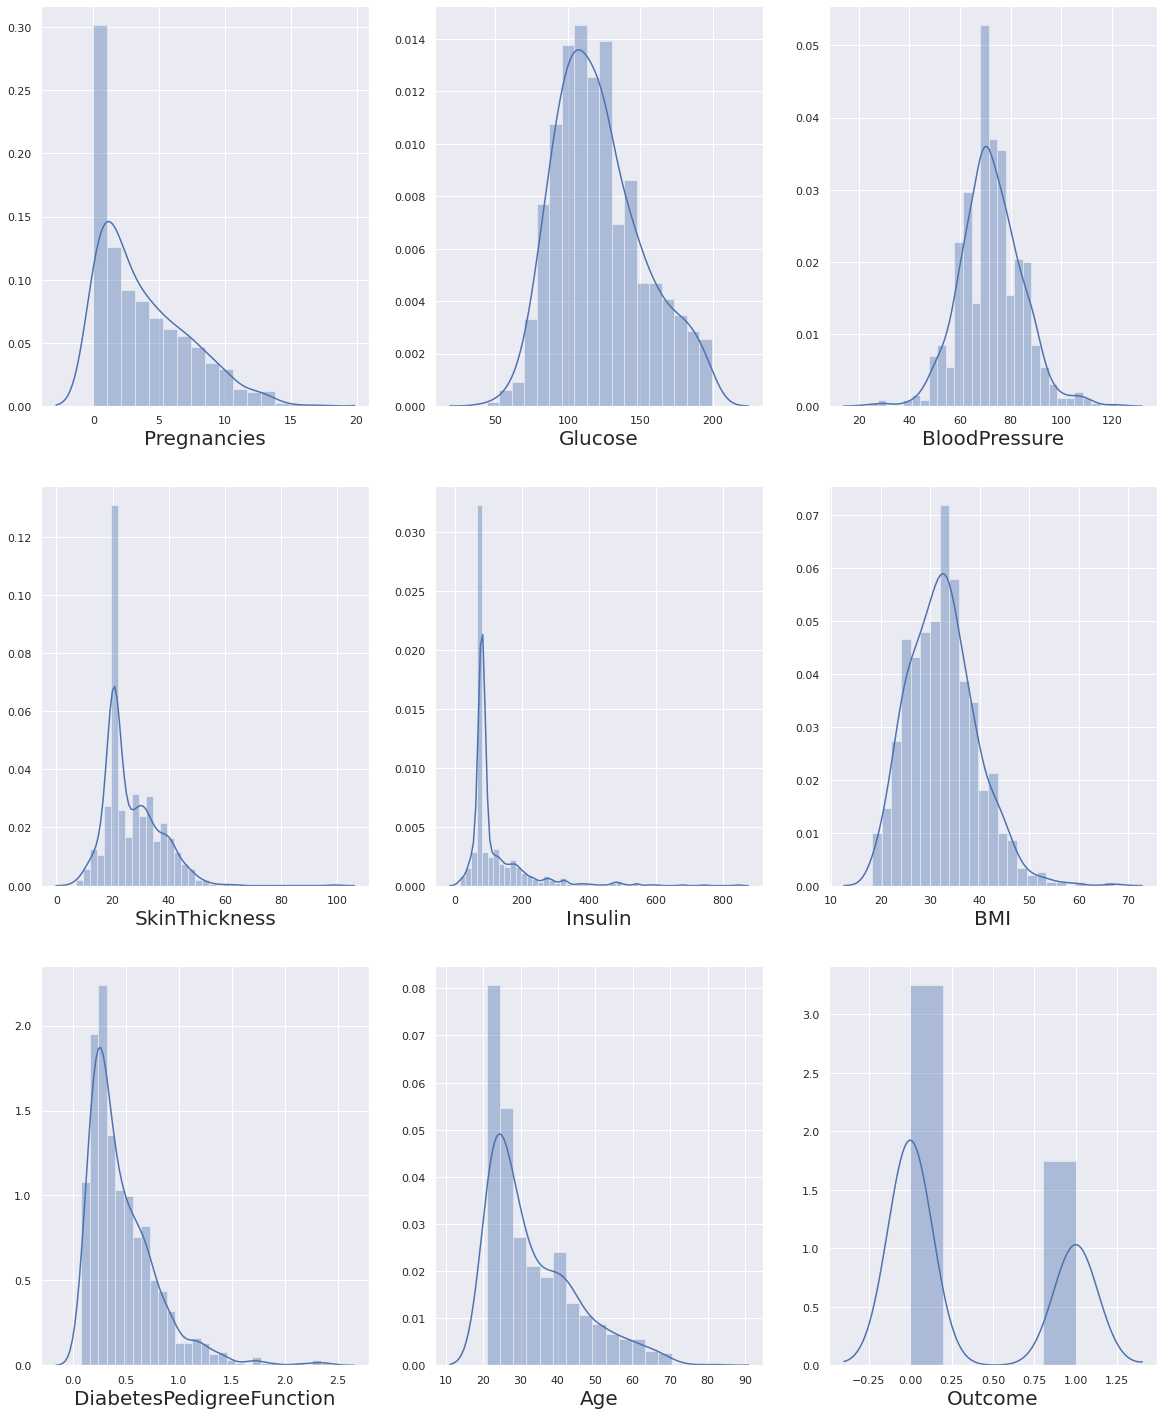

In [9]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

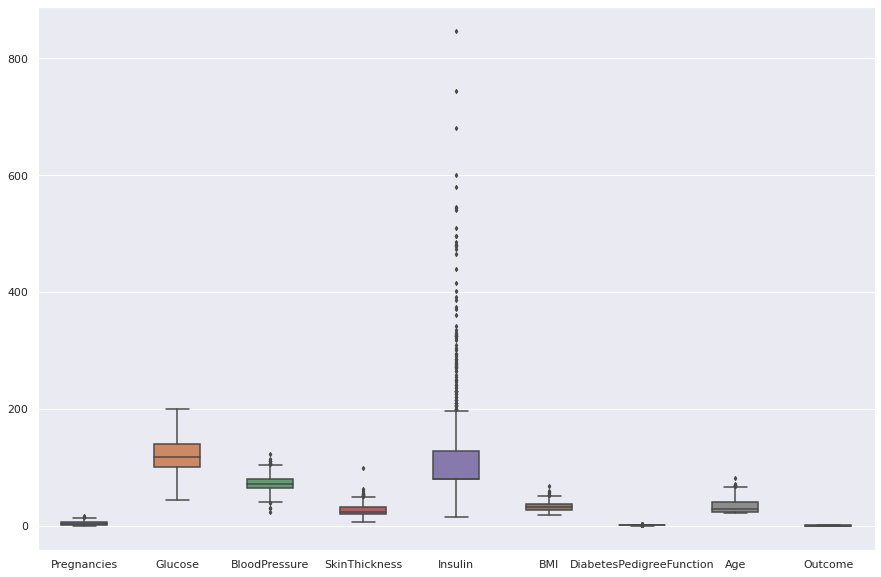

In [10]:

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)


In [11]:
q = data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

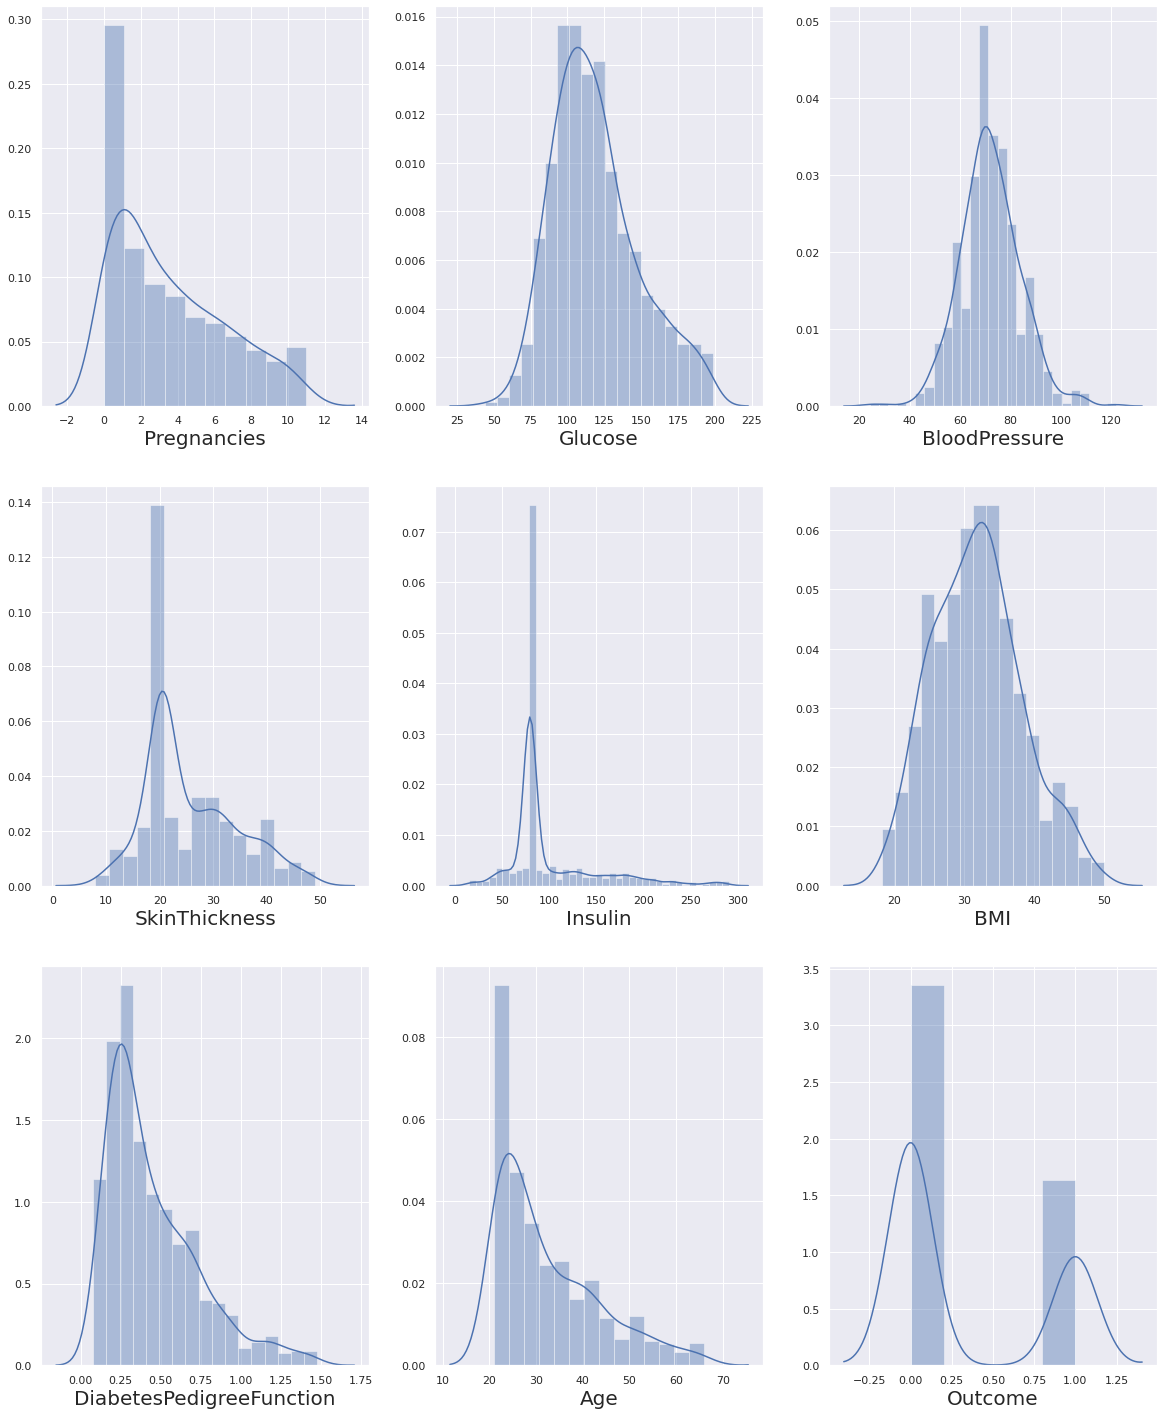

In [12]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [13]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

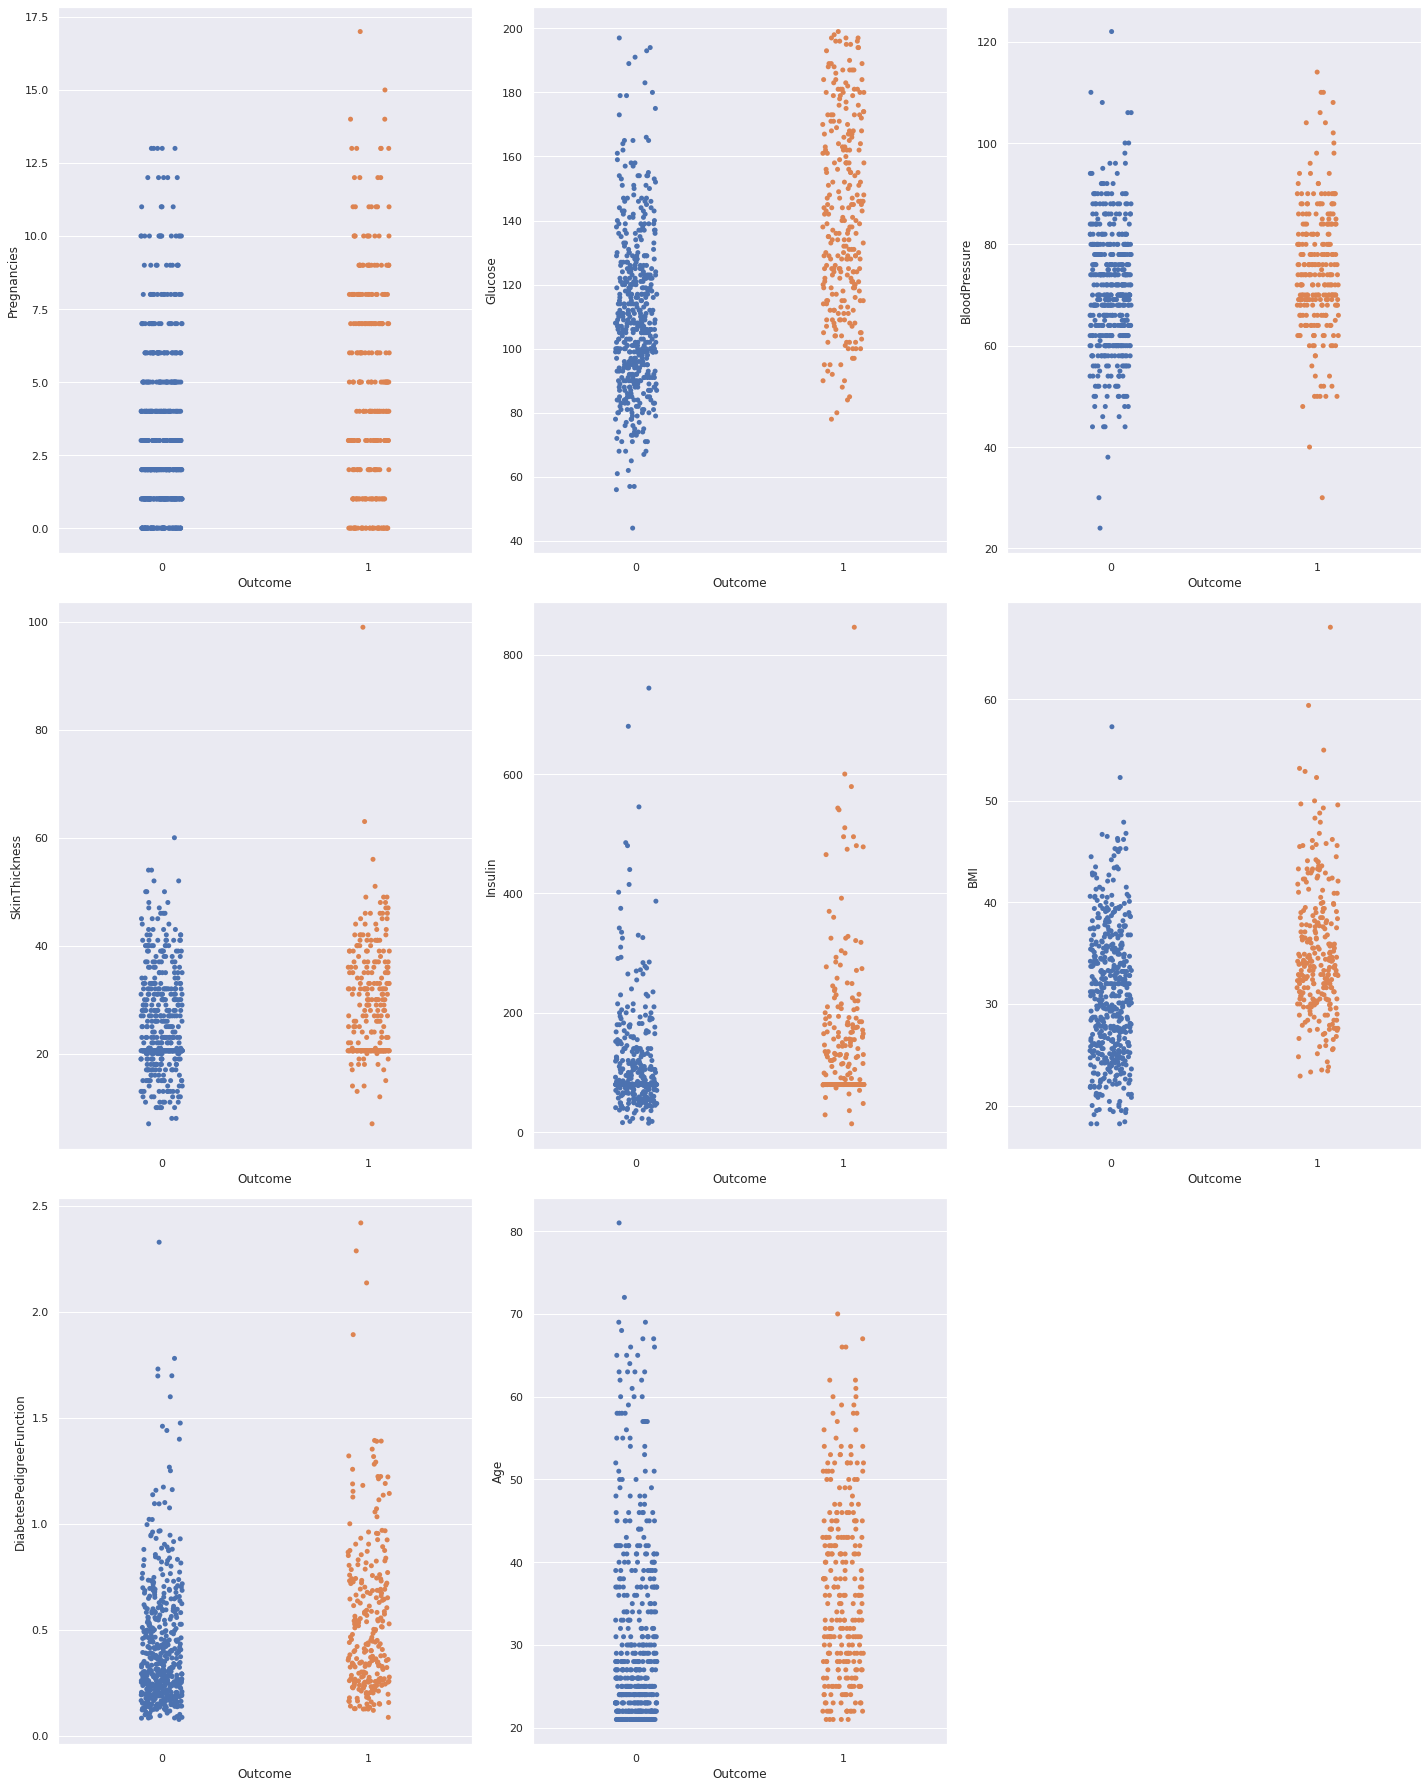

In [14]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

Great!! Let's proceed by checking multicollinearity in the dependent variables.
Before that, we should scale our data. Let's use the standard scaler for that.


In [15]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [16]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [17]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25)

In [18]:
# let's fit the data into kNN model and see how well it performs:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
y_pred = knn.predict(x_test)

In [20]:
knn.score(x_train,y_train)

0.8298611111111112

In [21]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.75


Let's try to increase the accuracy by using hyperparameter tuning.

In [22]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [23]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [24]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.759, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.722, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.757, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.722, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.704, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.793, total=   0.0s
[CV] algorith

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=11, score=0.765, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=11, score=0.765, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=11, score=0.722, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=11, score=0.696, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=12, score=0.767, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=12, score=0.783, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=12, score=0.774, 

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:    7.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [27]:
# let's see the  best parameters according to gridsearch
gridsearch.best_params_


{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 9}

In [28]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)

In [29]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [30]:
knn.score(x_train,y_train)

0.8055555555555556

Looks like accuracy for training has decreased, maybe our model was overfitting the data before. 
Let's see how it perfroms on the test data.

In [31]:
knn.score(x_test,y_test)

0.7552083333333334

Great, accuracy score has increased for our test data. So, indeed our model was overfitting before.
Now, it looks better.


Let's now use k-fold cross validation and check how well our model is generalizing over our dataset:
We are randomly selecting our k to be 12 for k fold.

In [32]:
#k-fold cross validation 
kfold = KFold(n_splits=12,random_state= 42)
kfold.get_n_splits(X_scaled)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


12

In [33]:
from statistics import mean
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    knn.fit(X_train,y_train)
    train_score_ = knn.score(X_train,y_train)
    test_score_ =  knn.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   0.8068181818181818 and test score is :   0.6875
for k =  2
train_score is :   0.7926136363636364 and test score is :   0.765625
for k =  3
train_score is :   0.7954545454545454 and test score is :   0.78125
for k =  4
train_score is :   0.7997159090909091 and test score is :   0.734375
for k =  5
train_score is :   0.7940340909090909 and test score is :   0.65625
for k =  6
train_score is :   0.7954545454545454 and test score is :   0.765625
for k =  7
train_score is :   0.7997159090909091 and test score is :   0.703125
for k =  8
train_score is :   0.7926136363636364 and test score is :   0.734375
for k =  9
train_score is :   0.7840909090909091 and test score is :   0.890625
for k =  10
train_score is :   0.7997159090909091 and test score is :   0.796875
for k =  11
train_score is :   0.7997159090909091 and test score is :   0.734375
for k =  12
train_score is :   0.7911931818181818 and test score is :   0.8125
*******************************************

([<matplotlib.axis.YTick at 0x7f2ca5f588d0>,
 <a list of 7 Text major ticklabel objects>)

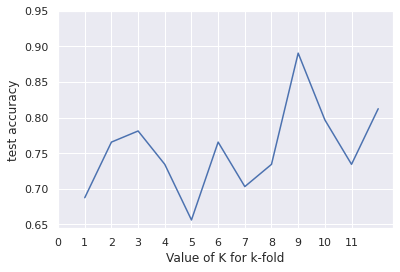

In [36]:
# let's plot the test_accuracy with the value of k in k-fold

plt.plot(count,test_score)
plt.xlabel('Value of K for k-fold')
plt.ylabel('test accuracy')
plt.xticks(np.arange(0, 12, 1)) 
plt.yticks(np.arange(0.65, 1, 0.05)) 

Average train score is :   0.7959280303030303


Average test score is :   0.7552083333333334

Our cross validation tells that on an avergae our model has a 75% accuracy on our test data.
so, that's how we can use cross validation to compute how well our model is generalizing on our data.

We can also use cross valdition score to opt between different models or to do hyperparameter tuning.